In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df=pd.read_excel("toyota3.xlsx")



In [3]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
df.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1436.0,721.555014,416.476890,1.0,361.75,721.5,1081.25,1442.0
Price,1436.0,10730.824513,3626.964585,4350.0,8450.00,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.00,61.0,70.00,80.0
Mfg_Month,1436.0,5.548747,3.354085,1.0,3.00,5.0,8.00,12.0
Mfg_Year,1436.0,1999.625348,1.540722,1998.0,1998.00,1999.0,2001.00,2004.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.00,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.00,110.0,110.00,192.0
Met_Color,1436.0,0.674791,0.468616,0.0,0.00,1.0,1.00,1.0
Automatic,1436.0,0.055710,0.229441,0.0,0.00,0.0,0.00,1.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.00,1600.0,1600.00,16000.0


In [7]:
print(df.isnull().sum())

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64


In [8]:
y=df["Price"]

In [9]:
X=df.drop("Price",axis=1)

In [10]:
X=X.drop(["Cylinders",'Id'],axis=1)

C:\Users\I NET\AppData\Local\Temp\ipykernel_5080\1249025239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


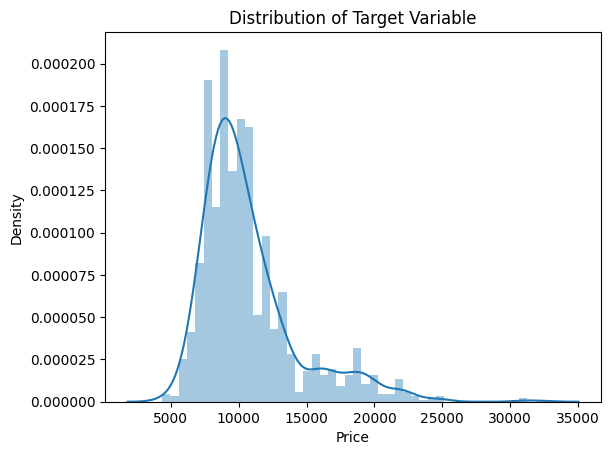

In [11]:
sns.distplot(y)
plt.title("Distribution of Target Variable")
plt.show()

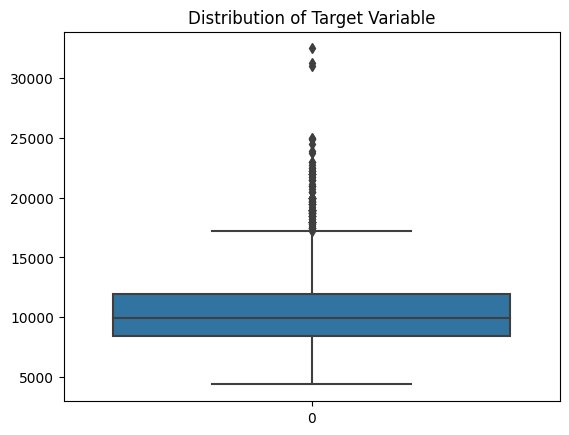

In [12]:
sns.boxplot(y)
plt.title("Distribution of Target Variable")
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
col=["Model","Fuel_Type","Color"]
for i in col:
    X[i]=lab.fit_transform(X[i])
    

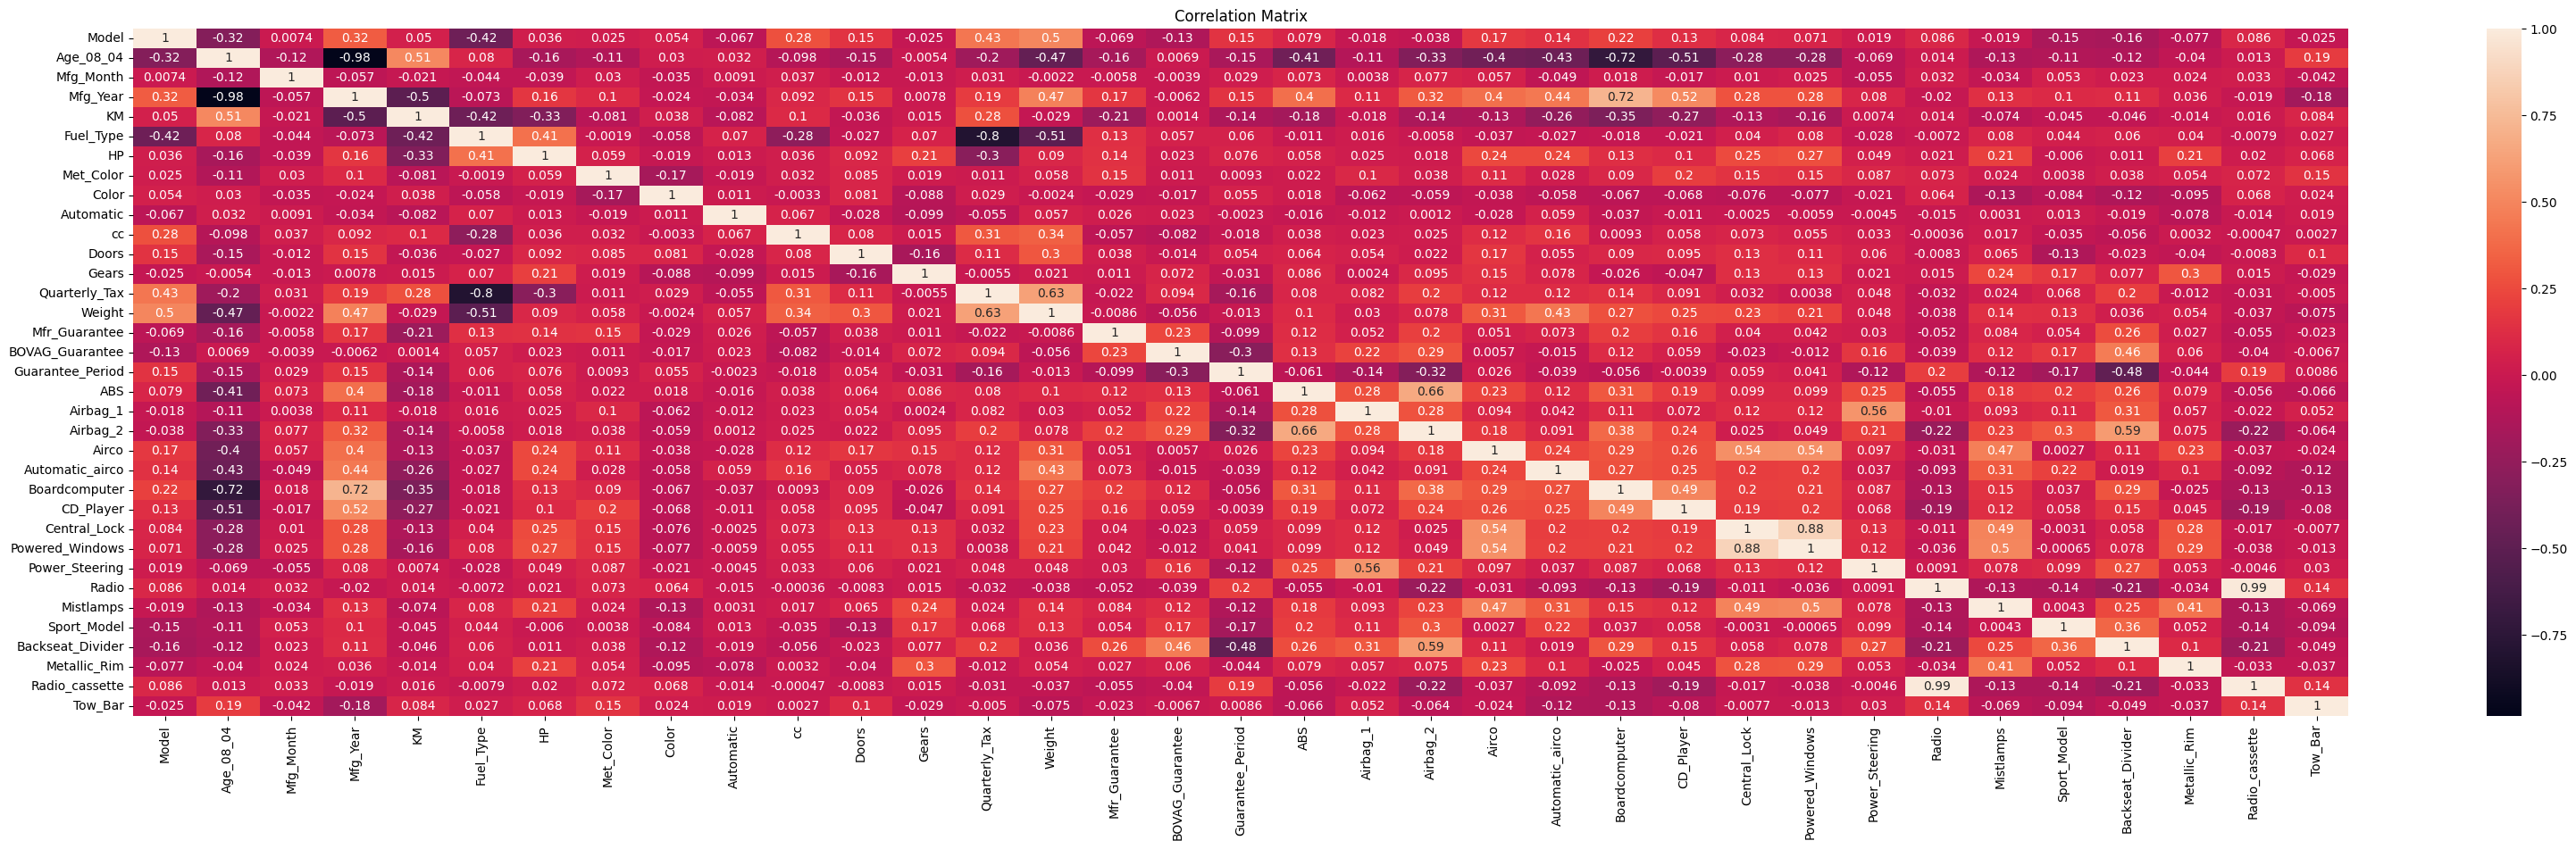

In [14]:
plt.figure(figsize=(40,10))
corr = X.corr()
sns.heatmap(corr,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [15]:
X=X.drop(["Mfg_Month",'Mfg_Year',"Radio_cassette"],axis=1)

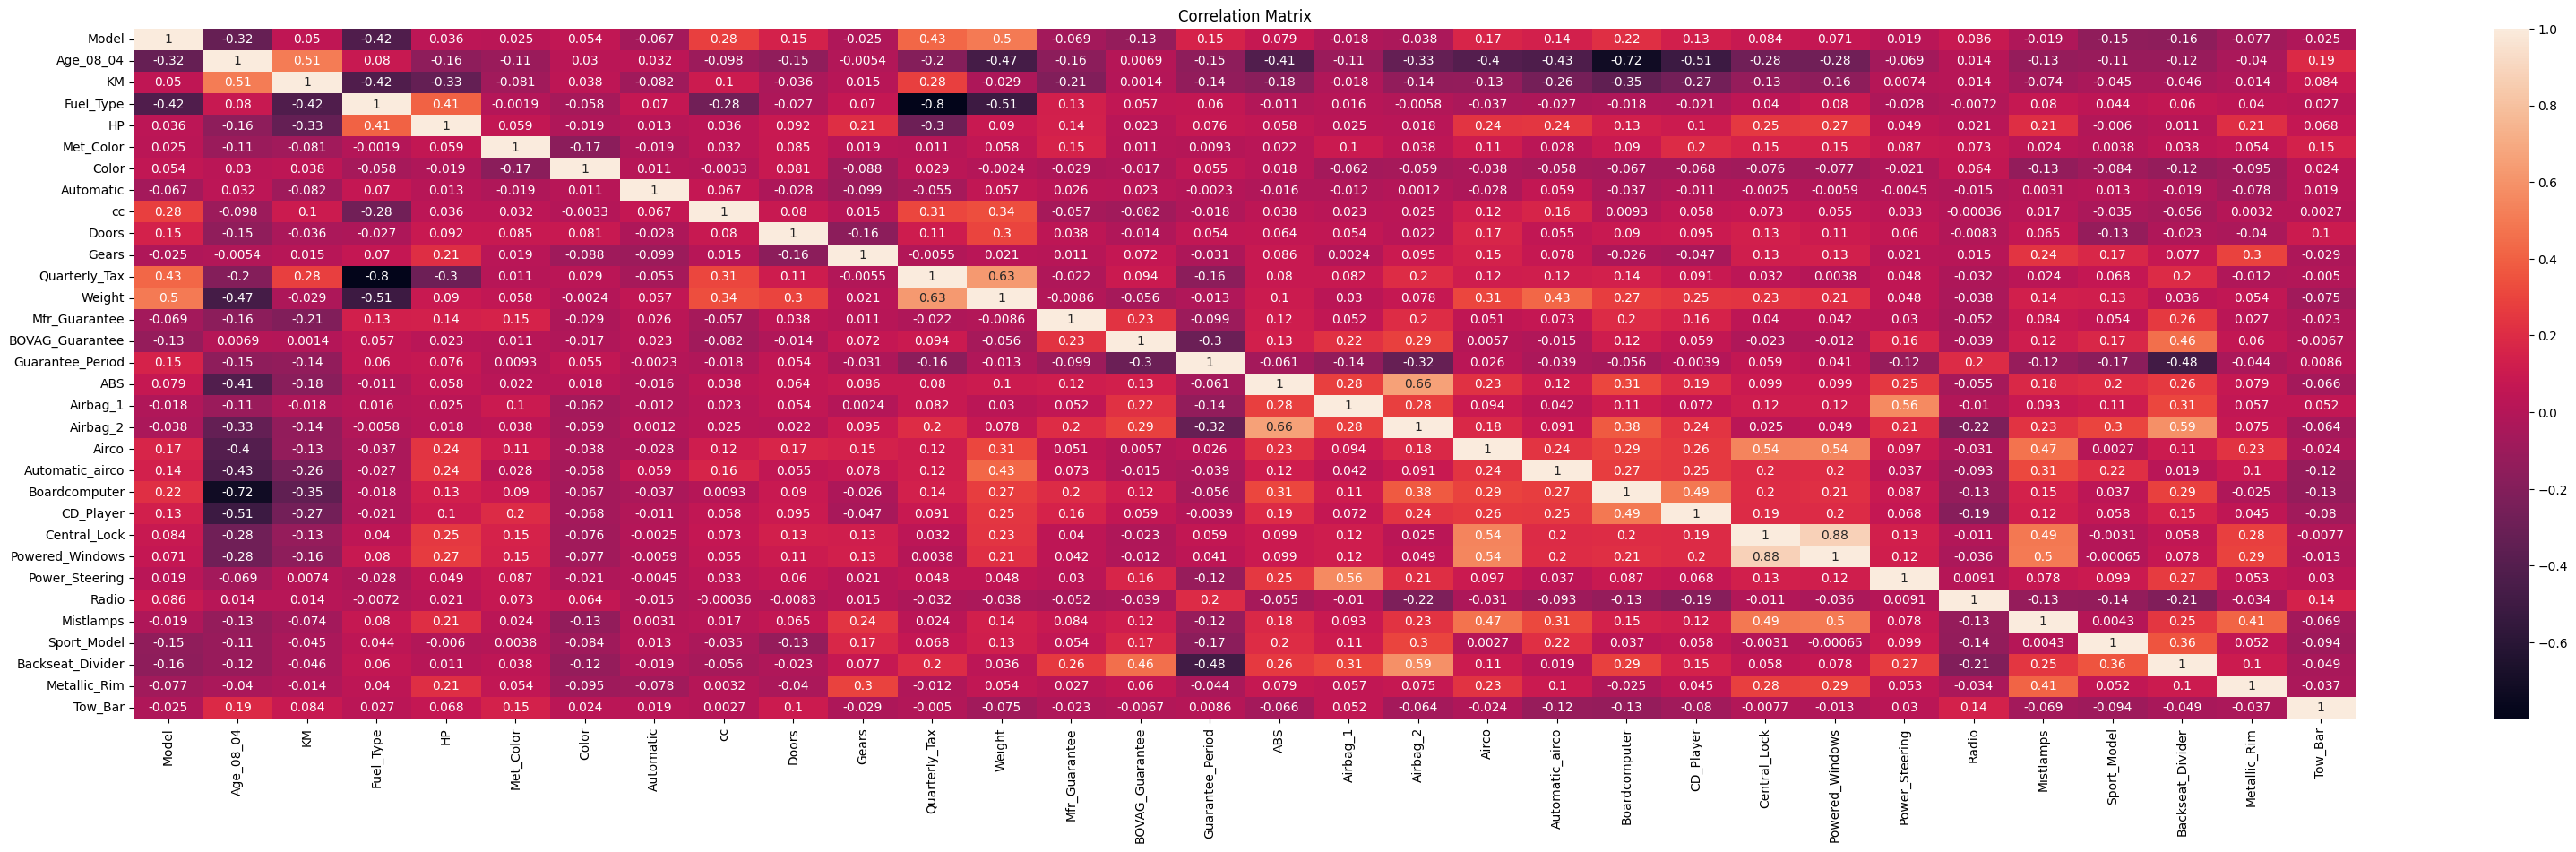

In [16]:
plt.figure(figsize=(40,10))
corr = X.corr()
sns.heatmap(corr,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [17]:
X=X.drop(["Boardcomputer"],axis=1)

# Building a model 

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
data=pd.merge(X_train,y_train,left_index=True,right_index= True)
Test_data=pd.merge(X_test, y_test,left_index=True,right_index= True)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     282.0
Date:                Fri, 13 Jan 2023   Prob (F-statistic):          2.54e-231
Time:                        11:17:11   Log-Likelihood:                -9086.1
No. Observations:                1005   AIC:                         1.819e+04
Df Residuals:                     997   BIC:                         1.823e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.101e+04   2476.443    -12.522

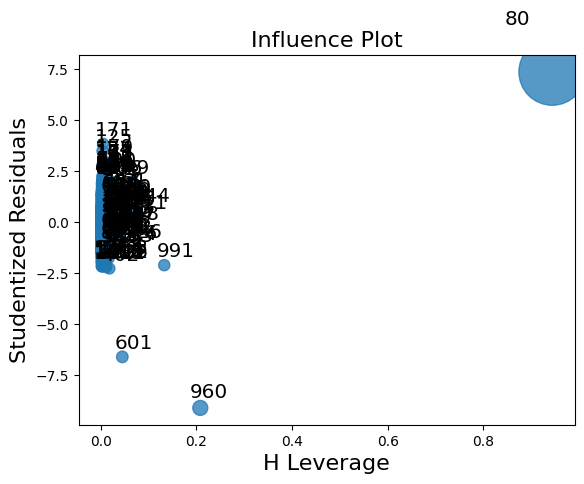

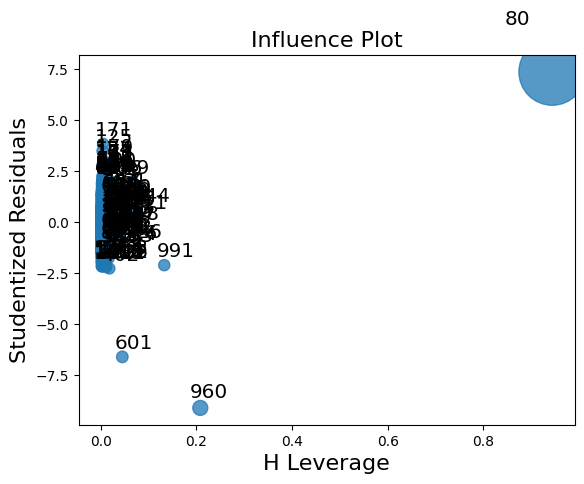

In [31]:
import statsmodels.formula.api as smf
#Model=1
m1=smf.ols("Price~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data=data).fit()
print(m1.summary())
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(m1)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     548.8
Date:                Fri, 13 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:28:58   Log-Likelihood:                -8613.1
No. Observations:                1005   AIC:                         1.725e+04
Df Residuals:                     992   BIC:                         1.732e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -4439.8512   1768.990  

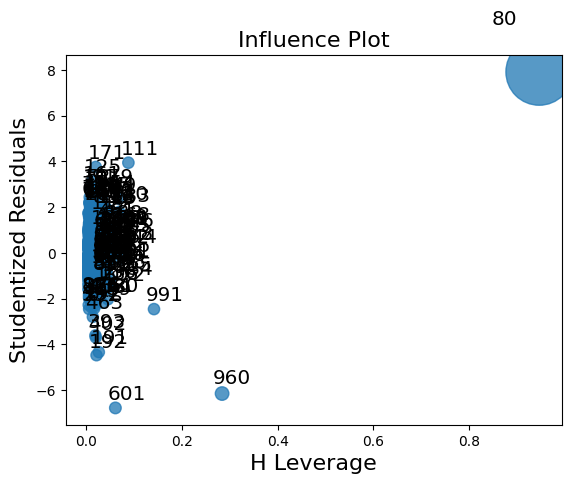

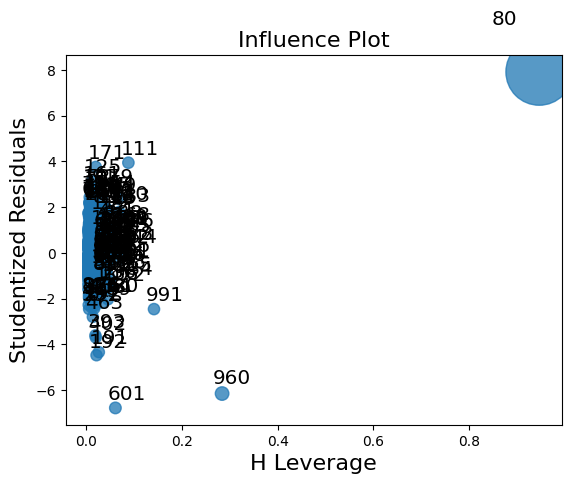

In [47]:
#model=2
m2=smf.ols("Price~Age_08_04+KM+HP+Power_Steering+Backseat_Divider+cc+Doors+Gears+Quarterly_Tax+Weight+Metallic_Rim+Mfr_Guarantee",data=data).fit()
print(m2.summary())
#Door is having probability value > 0.05 checking with influence index plot.
influence_plot(m2)

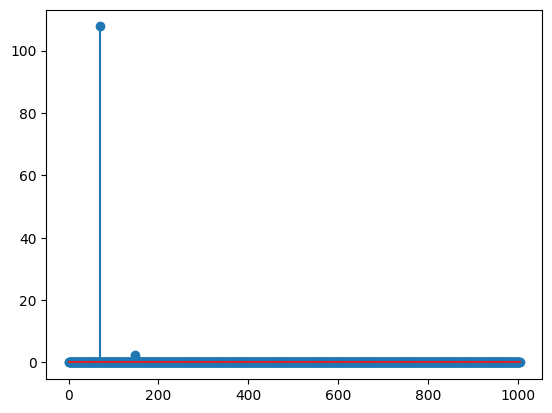

In [50]:
cooks_distance = m1.get_influence().cooks_distance[0]

plt.stem(cooks_distance)
plt.show()

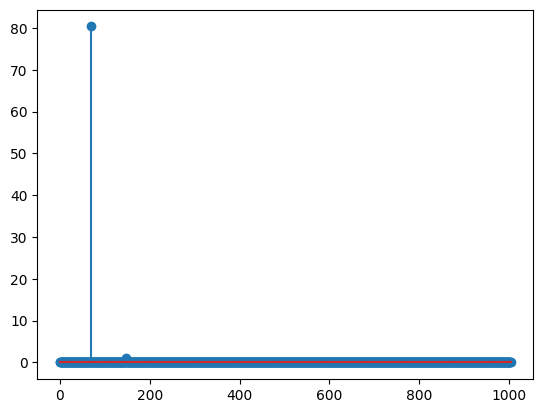

In [51]:
cooks_distance = m2.get_influence().cooks_distance[0]

plt.stem(cooks_distance)
plt.show()

# Remove outliers

In [52]:
# Set a threshold for Cook's distance
threshold = 4/len(data)
# Get the Cook's distance for each observation
cooks_distance = m1.get_influence().cooks_distance[0]
# Identify the observations to remove
outliers = cooks_distance > threshold
# Remove the outliers from the data
data_without_outliers = data[~outliers]


In [57]:
#model=2
m2=smf.ols("Price~Age_08_04+KM+HP+Power_Steering+Backseat_Divider+cc+Doors+Gears+Quarterly_Tax+Weight+Metallic_Rim+Mfr_Guarantee",data=data_without_outliers).fit()
print(m2.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     643.4
Date:                Fri, 13 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:41:32   Log-Likelihood:                -8025.2
No. Observations:                 958   AIC:                         1.608e+04
Df Residuals:                     945   BIC:                         1.614e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.484e+04   1811.716  

In [56]:
import statsmodels.formula.api as smf
#Model=1
m1=smf.ols("Price~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data=data_without_outliers).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     379.3
Date:                Fri, 13 Jan 2023   Prob (F-statistic):          5.26e-270
Time:                        11:41:07   Log-Likelihood:                -8447.8
No. Observations:                 958   AIC:                         1.691e+04
Df Residuals:                     950   BIC:                         1.695e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.227e+04   2463.621    -17.157

In [58]:
cooks_distance

array([5.65846468e-04, 1.03961926e-03, 2.67624628e-04, ...,
       6.33590277e-05, 5.05089638e-05, 3.57696587e-04])

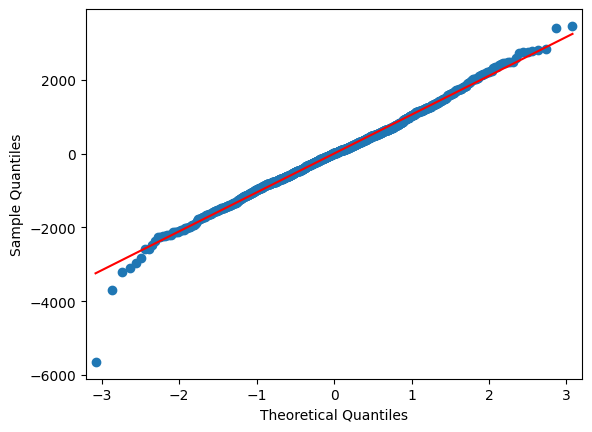

In [59]:
import statsmodels.api as sm
sm.qqplot(m2.resid, line='r')
plt.show()


In [67]:
#Train model predaction
Test_pred =m2.predict(Test_data)
train_pred =m2.predict(data)
residuals=Test_pred-y_test

# Residual Vs Regression

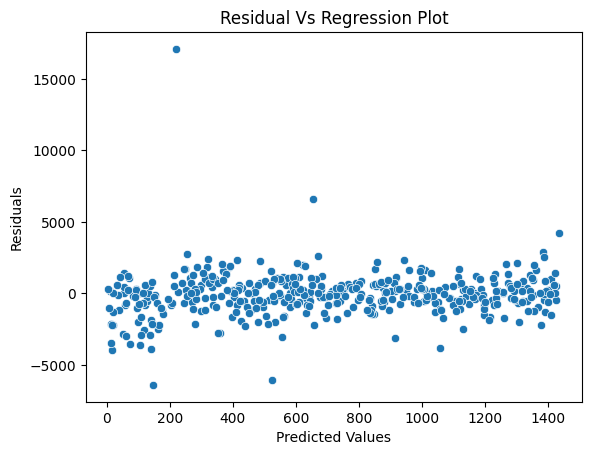

In [68]:

sns.scatterplot( residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Vs Regression Plot")
plt.show()